In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [30]:
# Generate Random Test Data

np.random.seed(1)  # For reproducibility

# Generate random solar masses
mean_mass, sigma_mass = np.log(1), 0.5  # Adjust parameters as needed
solar_masses = np.random.lognormal(mean_mass, sigma_mass, 1000)

# Generate random gravity values 
mean_grav, sigma_grav = 4.4, 0.5  #adjust mean and std dev
grav_values = np.random.normal(mean_grav, sigma_grav, 1000)

# Create a DataFrame
test_data = pd.DataFrame({
    'Solar Mass': solar_masses,
    'Stellar Surface Gravity (log g)': grav_values
})

print(test_data.head())


   Solar Mass  Stellar Surface Gravity (log g)
0    2.252797                         4.323382
1    0.736476                         3.183746
2    0.767908                         4.653992
3    0.584801                         4.237984
4    1.541420                         3.644462


In [31]:
# Filter Test Data

# Filter based on mass range (e.g., 0.1 to 10 solar masses)
filtered_data = test_data[(test_data['Solar Mass'] >= 0.1) & (test_data['Solar Mass'] <= 10)]

# Further filter based on surface gravity range (e.g., 3.5 to 5 for main-sequence stars)
filtered_data = filtered_data[(filtered_data['Stellar Surface Gravity (log g)'] >= 3.5) & (filtered_data['Stellar Surface Gravity (log g)'] <= 5)]

print(filtered_data.head())

   Solar Mass  Stellar Surface Gravity (log g)
0    2.252797                         4.323382
2    0.767908                         4.653992
3    0.584801                         4.237984
4    1.541420                         3.644462
5    0.316393                         3.964289


In [4]:
#read file

pd.read_csv('DataFinalProjectCSV.csv', on_bad_lines = "skip", skiprows = [0]) #column 1 = mass, column 5 = gravity


,st_mass,st_masserr1,st_masserr2,st_masslim,st_logg,st_loggerr1,st_loggerr2,st_logglim
0,2.60,0.40,-0.30,0.0,NaN,NaN,NaN,NaN
1,2.70,0.30,-0.30,0.0,2.31,0.10,-0.10,0.0
2,2.09,0.64,-0.63,0.0,2.45,0.08,-0.08,0.0
3,2.78,0.69,-0.69,0.0,1.93,0.07,-0.07,0.0
4,1.70,0.40,-0.30,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
35126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35127,1.48,0.90,-0.38,0.0,2.46,0.09,-0.09,0.0
35128,1.40,0.20,-0.20,0.0,NaN,NaN,NaN,NaN
35129,2.20,NaN,NaN,0.0,2.66,0.11,-0.11,0.0


In [5]:
df = pd.read_csv('DataFinalProjectCSV.csv')  

df.shape

(35132, 1)

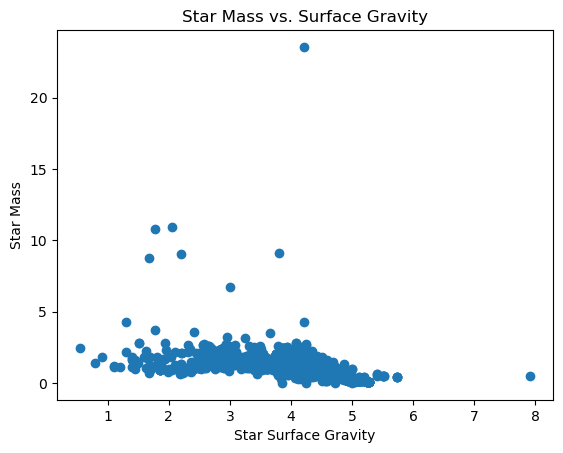

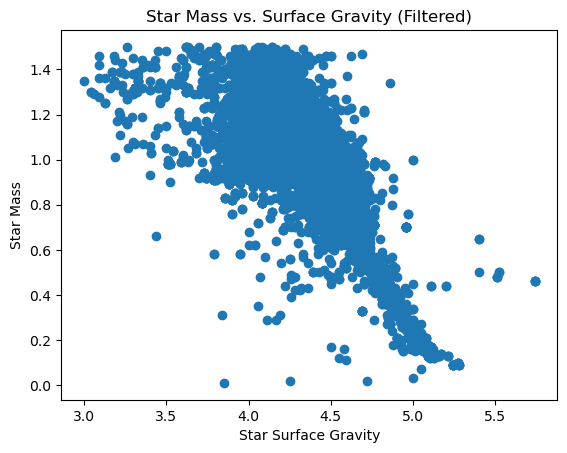

In [6]:
#plot data

df = pd.read_csv('DataFinalProjectCSV.csv', on_bad_lines = "skip", skiprows = [0])  

def extract_and_filter_data(df):
    st_mass = df.iloc[:, 0]  # mass: column 1: index 0
    stsur_grav = df.iloc[:, 4]  # gravity: column 5: index 4
    
    filtered_df = df[(st_mass >= 0) & (st_mass <= 1.5) & (stsur_grav >= 3) & (stsur_grav <= 6)] #restrict data to not account for the outliars
    return filtered_df.iloc[:, 0], filtered_df.iloc[:, 4]

st_mass, stsur_grav = extract_and_filter_data(df)

plt.scatter(stsur_grav, st_mass)
plt.ylabel('Star Mass')
plt.xlabel('Star Surface Gravity')
plt.title('Star Mass vs. Surface Gravity (Filtered)')
plt.show()

[0.00162457] [[8.85636841e-11]]


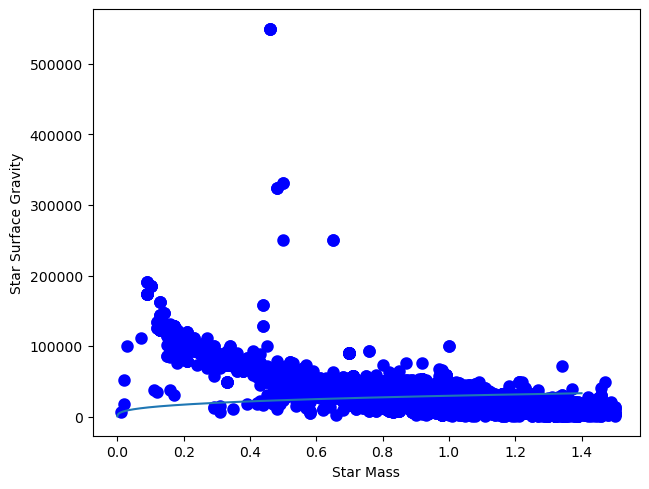

In [29]:
from scipy.optimize import curve_fit

G = (6.674*(10**-11))*(1000000)
sm_to_kg = 1.9891*(10**30)

def modelcurve(st_mass, p): 
    st_mass = np.asarray(st_mass)
    modelval = ((G*st_mass*sm_to_kg)/(((3*st_mass*sm_to_kg)/(4*p*3.14))**(2/3)))
    #np.seterr(divide='ignore', invalid='ignore')
    #modelval = ((G*st_mass)/(R**2))
    return modelval

#def model(st_mass, R):
    #return p * st_mass

do = np.linspace(0, 1.4, num = 35132)
ydata_unlogged = 10 ** stsur_grav

plt.figure()
plt.scatter(st_mass, ydata_unlogged, c = "blue", alpha = 1.0, linewidth = 3)
pvalue, fit = curve_fit(f=modelcurve, xdata=st_mass, ydata=ydata_unlogged)
print(pvalue, fit)
plt.plot(do,modelcurve(do, pvalue[0]))
plt.tight_layout()
#plt.ylim(0, 200000)
plt.ylabel('Star Surface Gravity')
plt.xlabel('Star Mass')
plt.show()
